In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import pylab as pl

from itertools import product

In [74]:
#data = pd.read_csv('../data/models/combined_mdot_alphaTH_0.csv')
#data = pd.read_csv('../data/models/combined_mdot_CE=TH.csv')

#data = pd.read_csv('../data/models/combined_jdotp_alphaTH_0.csv')
data = pd.read_csv('../data/models/combined_jdotp_CE=TH.csv')

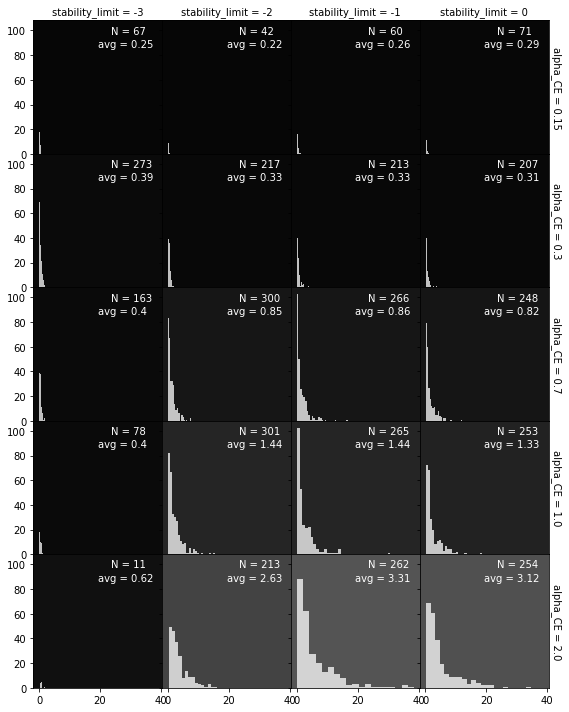

In [3]:
data_sel = data[(data['stability'] == 'CE') & (data['product'] == 'sdB') & (data['P_final'] < 40)]

data_sel = data_sel[data_sel['alpha_CE'].isin([0.15, 0.30, 0.70, 1.0, 2.0])]

def annotate(data, **kws):
    n = len(data)
    ax = pl.gca()
    avg = np.round(data['P_final'].median(),2)
    
    ax.text(.6, .9, f"N = {n}", transform=ax.transAxes, color='w')
    ax.text(.5, .8, f"avg = {avg}", transform=ax.transAxes, color='w')
    
    ax.set_facecolor("{}".format(avg / 10))

g = sns.FacetGrid(data_sel, col="stability_limit", row="alpha_CE", margin_titles=True, despine=False, height=2)
g.map_dataframe(annotate)
g.map_dataframe(sns.histplot, x="P_final", color='w', lw=0)
g.fig.subplots_adjust(wspace=0, hspace=0)

In [63]:
def create_heatmap(data, xpar='stability_limit', ypar='alpha_CE', process_function=None, **kwargs):
    
    x = data[xpar].unique()
    y = data[ypar].unique()
    
    cells = list(product(x, y))
    x, y, values = [], [], []
    
    for cel in cells:
        d = data[(data[xpar] == cel[0]) & (data[ypar] == cel[1])]
        x.append(cel[0])
        y.append(cel[1])
        values.append(process_function(d))
        
    table = pd.DataFrame(data={xpar:x, ypar:y, 'value':values})
    table = table.pivot(xpar, ypar, "value")
    
    sns.heatmap(table, annot=True, square=True, cbar_kws={"orientation": "horizontal"}, **kwargs)
    pl.title(process_function.__name__)
    
    
    lineind = list(table.columns).index(1.0) + 1
    pl.axvline(x=lineind, color='k', ls='--')
    

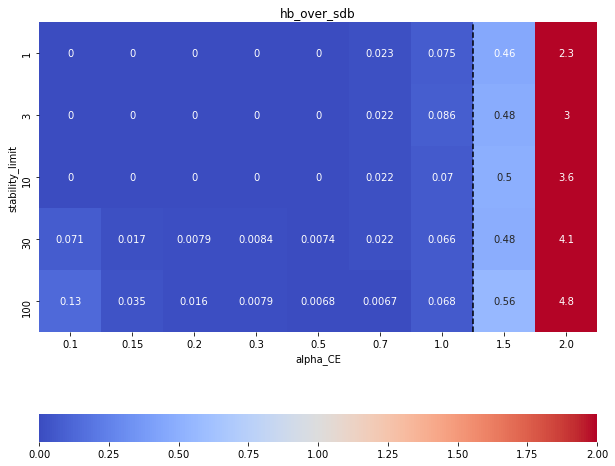

In [75]:
data_sel = data[data['stability'] == 'CE']

def hb_over_sdb(data):
    return len(data[data['product'] == 'HB']) / len(data[data['product'] == 'sdB'])

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=hb_over_sdb,
               vmax=2, cmap='coolwarm')

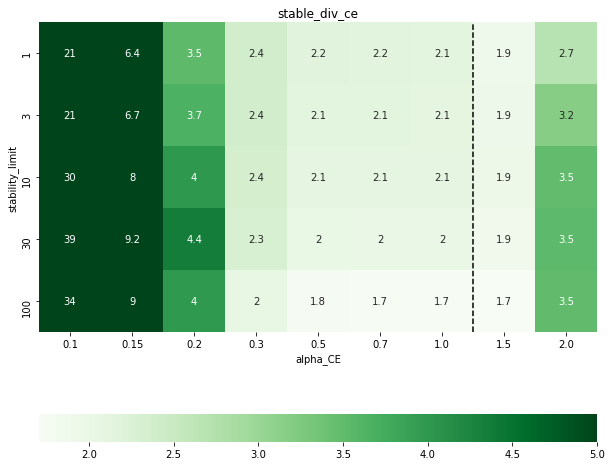

In [76]:
data_sel = data[data['product'] == 'sdB']

def stable_div_ce(data):
    return len(data[data['stability'] == 'stable']) / len(data[data['stability'] == 'CE'])

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=stable_div_ce,
               cmap='Greens', vmax=5)


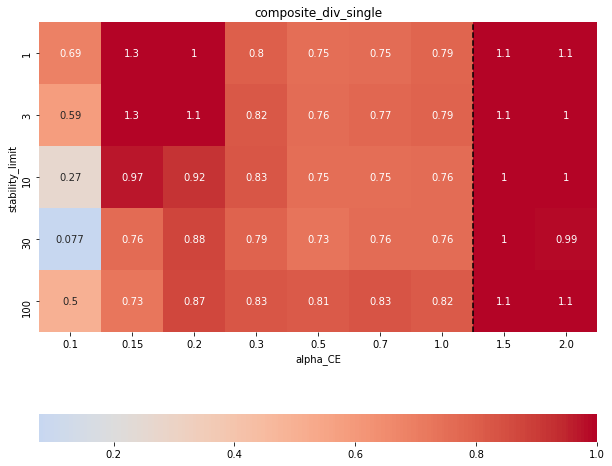

In [77]:
data_sel = data[(data['product'] == 'sdB') & (data['stability'] == 'CE')]

def composite_div_single(data):
    
    return len(data[data['M2_final'] > 0.5]) / len(data[data['M2_final'] < 0.5])

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=composite_div_single,
               center=0.2, cmap='coolwarm', vmax=1)

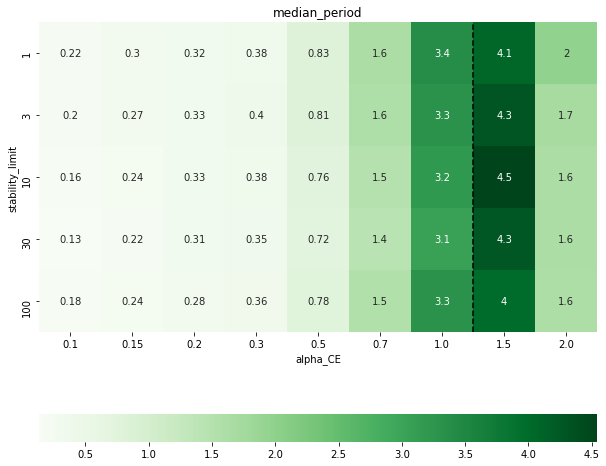

In [81]:
data_sel = data[(data['product'] == 'sdB') & (data['stability'] == 'CE')]

def median_period(data):
    
    return data['P_final'].median()

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=median_period,
               cmap='Greens')